In [ ]:
from keras.datasets import fashion_mnist # Загружаем базу fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization # Базовые слои для счёрточных сетей
from tensorflow.keras.optimizers import Adam, Adadelta # оптимизаторы
from tensorflow.keras import utils # Используем для One Hot Encoding
from tensorflow.keras.preprocessing import image # Для отрисовки изображений
from google.colab import files # Для работы с файлами
import numpy as np # Библиотека работы с массивами
import matplotlib.pyplot as plt # Для отрисовки графиков
from PIL import Image # Для работы с изображениями
import random # Для генерации случайных чисел 
import math # Для округления
import os # Для работы с функциями операционной системы
from google.colab import drive # Для работы с Google Drive

%matplotlib inline

In [ ]:
# Загружаем базу изображений с правильными ответами fashion_mnist
(x_train, y_train_original), (x_test, y_test_original) = fashion_mnist.load_data()

In [ ]:
# Выводим размерности обучающей и тестовой выборки
print("Обучающая выборка:")
print(x_train.shape)
print()

print("Правильные ответы в обучающей выборке:")
print(y_train_original.shape)
print()


print("Тестовая выборка:")
print(x_test.shape)
print()

print("Правильные ответы в тестовой выборке:")
print(y_test_original.shape)
# Почему при выводе .shape для ответов на выборки после , не стоит 1, как было в случае с Cifar10?
# Ответ: Это связано с тем, что в Cifar10 ответ хранился в 0 эл. массива.

Обучающая выборка:
(60000, 28, 28)

Правильные ответы в обучающей выборке:
(60000,)

Тестовая выборка:
(10000, 28, 28)

Правильные ответы в тестовой выборке:
(10000,)


In [ ]:
# Определяем названия классов изображений в зависимости от лэйбла
labels = ['Футболка', 'Брюки', 'Пуловер', 'Платье', 'Пальто', 'Сандали', 'Рубашка', 'Кроссовок', 'Сумка', 'Ботинки']


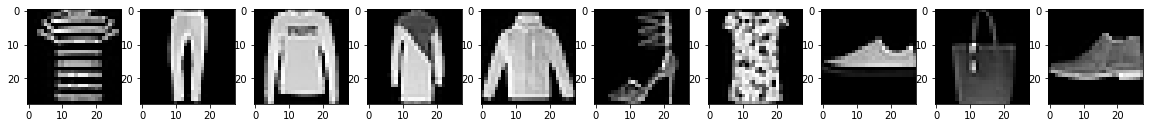

Правильные ответы: 0(Футболка); 1(Брюки); 2(Пуловер); 3(Платье); 4(Пальто); 5(Сандали); 6(Рубашка); 7(Кроссовок); 8(Сумка); 9(Ботинки); 


In [ ]:
# Выводим для примера картинки и лэйблы для каждого класса

fig, axs = plt.subplots(1, 10, figsize=(20, 3)) # Создаем полотно из 10 графиков
y = ''
for i in range(10): # Проходим по классам от 0 до 9
  label_indexes = np.where(y_train_original==i)[0] # Получаем список из индексов положений класса i в y_train
  index = random.choice(label_indexes) # Случайным образом выбираем из списка индекс
  img = x_train[index] # Выбираем из x_train нужное изображение
  label = y_train_original[index] #
  y += str(label) + "("+labels[label]+"); " # Созраняем лэйблы для каждой картинки
  axs[i].imshow(Image.fromarray(img), cmap='gray') # Отображаем изображение i-ым графиков # cmap='gray' - параметр для отображения изображений в ЧБ.

# Отображаем картинки и соответствующие картинкам лэйблы
plt.show()
print("Правильные ответы:", y)

In [ ]:
# Решейпим картинки, чтобы получилось обучить на них нейронную сеть

# Conv 2D - нужны списки, хар. цвет. Добавляем эту размерность.

x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)


# Для отображения ЧБ изображений исп. cmap gray



In [ ]:
# Выводим размерности обучающей и тестовой выборки
print("Обучающая выборка:")
print(x_train.shape)
print()

print("Правильные ответы в обучающей выборке:")
print(y_train_original.shape)
print()


print("Тестовая выборка:")
print(x_test.shape)
print()

print("Правильные ответы в тестовой выборке:")
print(y_test_original.shape)

Обучающая выборка:
(60000, 28, 28, 1)

Правильные ответы в обучающей выборке:
(60000,)

Тестовая выборка:
(10000, 28, 28, 1)

Правильные ответы в тестовой выборке:
(10000,)


In [ ]:
# Превращаем y_train и y_test сетей в формат one hot encoding
y_train = utils.to_categorical(y_train_original, 10)
y_test = utils.to_categorical(y_test_original, 10)

print("Обучающая выборка:")
print(y_train_original[5], "->", y_train[5])
print(y_train_original[234], "->", y_train[234])
print(y_train_original[45477], "->", y_train[45477])
print(y_train_original[14848], "->", y_train[14848])
print()

print("Тестовая выборка:")
print(y_train_original[15], "->", y_train[15])
print(y_train_original[334], "->", y_train[334])
print(y_train_original[8477], "->", y_train[8477])
print(y_train_original[3768], "->", y_train[3768])

Обучающая выборка:
2 -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2 -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
6 -> [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
2 -> [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]

Тестовая выборка:
9 -> [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
3 -> [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
7 -> [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
8 -> [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [ ]:
# Разделяем тестовую выборку на проверочную и тестовую
x_val = x_test[0:8000]
y_val = y_test[0:8000]

x_test = x_test[8000:]
y_test = y_test[8000:]


In [ ]:
# Проверим еще раз размерности выборотк

print("Обучающая выборка:")
print(x_train.shape)
print(y_train.shape)
print()

print("Проверочная выборка:")
print(x_val.shape)
print(y_val.shape)
print()

print("Тестовая выборка:")
print(x_test.shape)
print(y_test.shape)

Обучающая выборка:
(60000, 28, 28, 1)
(60000, 10)

Проверочная выборка:
(8000, 28, 28, 1)
(8000, 10)

Тестовая выборка:
(2000, 28, 28, 1)
(2000, 10)


Сверточная нейронная сеть

In [ ]:
# задаём batch_size
batch_size = 128 

# Создаем последовательную модель
model = Sequential()
# Слой пакетной нормализации
model.add(BatchNormalization(input_shape=(28, 28, 1), name="bn1")) # input_shape=() - размеры входных изображений. Указываю 28, 28, 1 т.к. это формат изображений датасета
# Первый сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name="Conv2D-layer1"))
# Второй сверточный слой
model.add(Conv2D(32, (3, 3), padding='same', activation='relu', name="Conv2D-layer2"))
# Первый слой уменьшения изображения в 2 раза
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer1"))
# Слой Dropout
model.add(Dropout(0.25, name="Dropout-layer1"))

# Слой пакетной нормализации
model.add(BatchNormalization(name = "bn2"))
# Третий сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name = "Conv2D-layer3"))
# Четвертый сверточный слой
model.add(Conv2D(64, (3, 3), padding='same', activation='relu', name = "Conv2D-layer4"))
# Второй слой уменьшения изображения в 2 раза
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer2"))
# Слой Dropout
model.add(Dropout(0.25, name="Dropout-layer2"))

# Слой пакетной нормализации
model.add(BatchNormalization(name = "bn3"))
# Пятый сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name = "Conv2D-layer5"))
# Шестой сверточный слой
model.add(Conv2D(128, (3, 3), padding='same', activation='relu', name = "Conv2D-layer6"))
# Третий слой уменьшения изображения в 2 раза
model.add(MaxPooling2D(pool_size=(2, 2), name="mp2D-layer3"))
# Слой регуляризации Dropout
model.add(Dropout(0.25, name="Dropout-layer3"))

# Слой преобразования данных из 2D представления в плоское
model.add(Flatten(name="flatten"))
# Выходной полносвязный классифицирующий слой
model.add(Dense(10, activation='softmax', name = "labels"))

# Компилируем сеть
#model.compile(loss="categorical_crossentropy", optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])
model.compile(loss="categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bn1 (BatchNormalization)     (None, 28, 28, 1)         4         
_________________________________________________________________
Conv2D-layer1 (Conv2D)       (None, 28, 28, 32)        320       
_________________________________________________________________
Conv2D-layer2 (Conv2D)       (None, 28, 28, 32)        9248      
_________________________________________________________________
mp2D-layer1 (MaxPooling2D)   (None, 14, 14, 32)        0         
_________________________________________________________________
Dropout-layer1 (Dropout)     (None, 14, 14, 32)        0         
_________________________________________________________________
bn2 (BatchNormalization)     (None, 14, 14, 32)        128       
_________________________________________________________________
Conv2D-layer3 (Conv2D)       (None, 14, 14, 64)       

Epoch 1/15
469/469 [==============================] - 13s 26ms/step - loss: 0.4747 - accuracy: 0.8259 - val_loss: 0.3473 - val_accuracy: 0.8801
Epoch 2/15
469/469 [==============================] - 12s 25ms/step - loss: 0.3042 - accuracy: 0.8898 - val_loss: 0.2581 - val_accuracy: 0.9071
Epoch 3/15
469/469 [==============================] - 12s 25ms/step - loss: 0.2637 - accuracy: 0.9046 - val_loss: 0.2427 - val_accuracy: 0.9105
Epoch 4/15
469/469 [==============================] - 12s 25ms/step - loss: 0.2418 - accuracy: 0.9108 - val_loss: 0.2394 - val_accuracy: 0.9169
Epoch 5/15
469/469 [==============================] - 12s 25ms/step - loss: 0.2226 - accuracy: 0.9181 - val_loss: 0.2466 - val_accuracy: 0.9133
Epoch 6/15
469/469 [==============================] - 12s 25ms/step - loss: 0.2121 - accuracy: 0.9223 - val_loss: 0.2207 - val_accuracy: 0.9205
Epoch 7/15
469/469 [==============================] - 12s 26ms/step - loss: 0.2014 - accuracy: 0.9251 - val_loss: 0.2497 - val_accuracy:

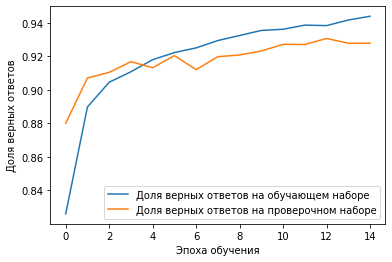

In [ ]:
# Обучаем сеть на данных fashion_mnist
history = model.fit(x_train, 
                    y_train, 
                    batch_size=batch_size, 
                    epochs=15,
                    validation_data=(x_val, y_val),
                    verbose=1)

# Отображаем график точности обучения
plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()


Работа модели в реальных условиях

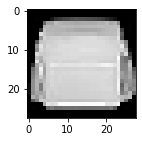

Выход сети:
[1.5269761e-05 2.4554771e-07 4.8427472e-07 1.5598545e-07 6.6157135e-08
 9.8422379e-07 4.7399608e-06 1.2265390e-08 9.9995780e-01 2.0321264e-05]

0 -> 0.0000152697612065821886062622070312500000
1 -> 0.0000002455477101648284588009119033813477
2 -> 0.0000004842747216571297030895948410034180
3 -> 0.0000001559854467814147938042879104614258
4 -> 0.0000000661571348814504744950681924819946
5 -> 0.0000009842237886914517730474472045898438
6 -> 0.0000047399607865372672677040100097656250
7 -> 0.0000000122653895928692691086325794458389
8 -> 0.9999577999114990234375000000000000000000
9 -> 0.0000203212639462435618042945861816406250

Распознан объект:  8 - Сумка
Верный ответ:  8 - Сумка


In [ ]:
# Подаем в нейросеть все картинки из тестовой выборки
prediction = model.predict(x_test)

# Выбираем номер для примера
n = 1022 # 1122 # 1137 # 1132 #1122

# Покажем картинку
img = x_test[n]
img = img.reshape(28, 28)
img = img.astype('uint8')
plt.figure(figsize=(2, 2))
plt.imshow(Image.fromarray(img), cmap='gray') #Отображаем изображение i-ым графиков # cmap='gray' - параметр для отображения изображений в ЧБ.
plt.show()

print("Выход сети:")
print(prediction[n])
print()
for i in range(10):
  print(i,"->","{:.40f}".format(prediction[n][i]))
print()
print("Распознан объект: ", np.argmax(prediction[n]), "-", labels[np.argmax(prediction[n])])
print("Верный ответ: ", np.argmax(y_test[n]), "-", labels[np.argmax(y_test[n])])
